In [1]:
from sklearn import tree
import pandas as pd
import os 
import numpy as np
from pandas.plotting import scatter_matrix 

In [2]:
file = 'clt_temps.csv'

In [3]:
df = pd.read_csv(file, encoding ="ISO-8859-1")

In [4]:
score_df = df.loc[:, ["date_time", "avg_temp", "precip_water", "snow", "snow_ice_depth"]]

In [5]:
score_df.head()

,date_time,avg_temp,precip_water,snow,snow_ice_depth
0,1948-09-01,71.5,0.00,0.0,0.0
1,1948-09-02,69.0,0.00,0.0,0.0
2,1948-09-03,72.0,0.00,0.0,0.0
3,1948-09-04,69.0,0.29,0.0,0.0
4,1948-09-05,72.0,0.06,0.0,0.0


In [6]:
score_df["precip"] = score_df["snow"] + score_df["snow_ice_depth"] + score_df["precip_water"]


In [7]:
score_df.head(10)

,date_time,avg_temp,precip_water,snow,snow_ice_depth,precip
0,1948-09-01,71.5,0.00,0.0,0.0,0.00
1,1948-09-02,69.0,0.00,0.0,0.0,0.00
2,1948-09-03,72.0,0.00,0.0,0.0,0.00
3,1948-09-04,69.0,0.29,0.0,0.0,0.29
4,1948-09-05,72.0,0.06,0.0,0.0,0.06
5,1948-09-06,72.0,0.40,0.0,0.0,0.40
6,1948-09-07,75.0,0.65,0.0,0.0,0.65
7,1948-09-08,76.0,0.00,0.0,0.0,0.00
8,1948-09-09,77.5,0.00,0.0,0.0,0.00
9,1948-09-10,75.0,0.00,0.0,0.0,0.00


In [8]:
conditions = [
    (score_df['precip'] == 0.00) & (score_df['avg_temp'] >= 70) & (score_df['avg_temp'] <= 80)]
choices = [2]
score_df['score'] = np.select(conditions, choices, default=1)

In [9]:
score_df.head()

,date_time,avg_temp,precip_water,snow,snow_ice_depth,precip,score
0,1948-09-01,71.5,0.00,0.0,0.0,0.00,2
1,1948-09-02,69.0,0.00,0.0,0.0,0.00,1
2,1948-09-03,72.0,0.00,0.0,0.0,0.00,2
3,1948-09-04,69.0,0.29,0.0,0.0,0.29,1
4,1948-09-05,72.0,0.06,0.0,0.0,0.06,1


In [10]:
score_df.to_csv('dates_scored.csv')

In [11]:
score_df.corr().style.background_gradient()

,avg_temp,precip_water,snow,snow_ice_depth,precip,score
avg_temp,1,0.0132684,-0.106843,-0.139758,-0.116617,0.433078
precip_water,0.0132684,1,0.082157,0.0111694,0.600294,-0.162994
snow,-0.106843,0.082157,1,0.300252,0.643726,-0.0250891
snow_ice_depth,-0.139758,0.0111694,0.300252,1,0.694051,-0.0327979
precip,-0.116617,0.600294,0.643726,0.694051,1,-0.120182
score,0.433078,-0.162994,-0.0250891,-0.0327979,-0.120182,1


In [12]:
x = score_df[["avg_temp","precip"]]
x.head()

,avg_temp,precip
0,71.5,0.00
1,69.0,0.00
2,72.0,0.00
3,69.0,0.29
4,72.0,0.06


In [13]:
y = score_df["score"]
y.head()

0    2
1    1
2    2
3    1
4    1
Name: score, dtype: int32

In [14]:
y= score_df.score.values.reshape(-1, 1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [15]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(x, y)

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
model = SVC(kernel='linear')
model.fit(x, y)

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)
predictions = model.predict(x_test)


C:\Users\danie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
np.unique(predictions)

array([1, 2])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["good day", "bad day"]))

              precision    recall  f1-score   support

    good day       0.92      0.90      0.91      5396
     bad day       0.57      0.64      0.60      1104

    accuracy                           0.86      6500
   macro avg       0.75      0.77      0.76      6500
weighted avg       0.86      0.86      0.86      6500



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017B6D04F0F0>,
      dtype=object)

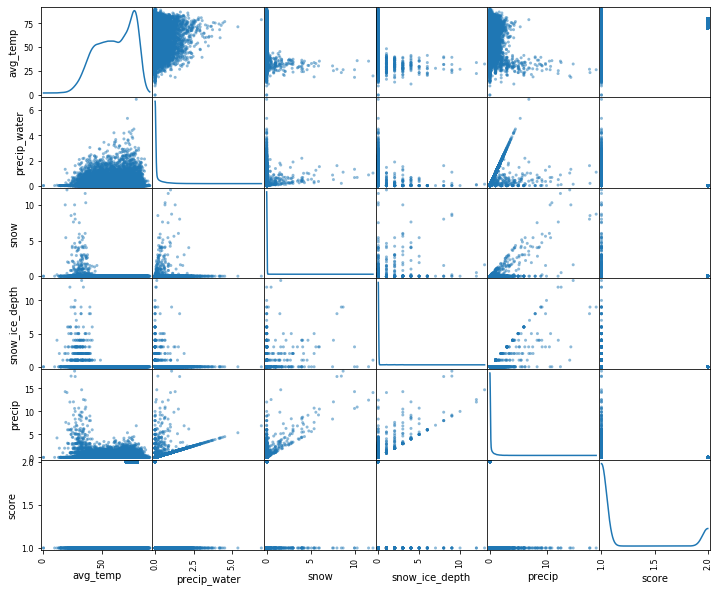

In [22]:
scatter_matrix(score_df.loc[:, 'date_time':'score'], figsize = (12,10), diagonal='kde')